#### Arbol de decision para especies de flores

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [4]:
data = pd.read_csv("../datasets/iris/iris.csv")
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
data.shape

(150, 5)

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

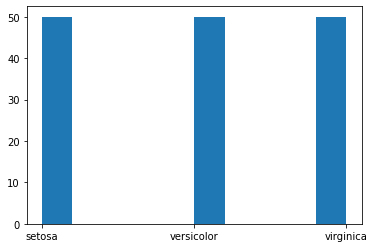

In [6]:
plt.hist(data.Species)

In [12]:
colnames = data.columns.to_list()
predictors = colnames[:4]
target = colnames[4]

In [13]:
X = data[predictors]
y =  data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
# min_sample_split epecifica el minimo numero de observaciones necesarias
# para que un nodo se divida en subnodo
tree =  DecisionTreeClassifier(criterion="entropy", min_samples_split=20,random_state=42)
tree.fit(X_train,y_train)
preds = tree.predict(X_test)

In [18]:
pd.crosstab(y_test,preds,rownames=['Actual'], colnames=["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,19,0,0
versicolor,0,15,0
virginica,0,1,15


#### Visualización de arbol de decision

In [23]:
with open("../resources/iris_dtree.dot","w") as dotfile:
    export_graphviz(tree,out_file=dotfile,feature_names=predictors)
    dotfile.close()

In [2]:
import os
import graphviz
from graphviz import Source

ModuleNotFoundError: No module named 'graphviz'

In [ ]:
file = open("../resources/iris_dtree.dot")

#### Cross validation para la poda
Vamos a ir podando el arbol para obtener una profundidad optima que no sufra problemas de over fitting ni de under fitting.
La validacion cruzada divide el dataset en conjunto de entrenamiento y conjunto de testing y lleva a cabo diferentes veces el algoritmo para intentar generalizar los resultados en el modelo.

In [24]:
X= data[predictors]
y = data[target]

tree = DecisionTreeClassifier(criterion="entropy",max_depth=5,min_samples_split=20,random_state=42)
tree.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20,
                       random_state=42)

In [27]:
cv = KFold(n_splits=10,shuffle=True,random_state=42)

In [30]:
score = np.mean(cross_val_score(tree,X,y,scoring="accuracy",cv=cv))

In [31]:
score

0.9466666666666667

In [36]:
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion="entropy",max_depth=i,min_samples_split=20,random_state=42)
    tree.fit(X,y)
    cv = KFold(n_splits=10,shuffle=True,random_state=42)
    score = np.mean(cross_val_score(tree,X,y,scoring="accuracy",cv=cv))
    print(f"Score para max depth={i}, sore:{score}")
    print(" ",tree.feature_importances_)

Score para max depth=1, sore:0.6066666666666667
  [0. 0. 1. 0.]
Score para max depth=2, sore:0.9466666666666667
  [0.         0.         0.66620285 0.33379715]
Score para max depth=3, sore:0.9533333333333334
  [0.         0.         0.68976981 0.31023019]
Score para max depth=4, sore:0.9466666666666667
  [0.         0.         0.66869158 0.33130842]
Score para max depth=5, sore:0.9466666666666667
  [0.         0.         0.66869158 0.33130842]
Score para max depth=6, sore:0.9466666666666667
  [0.         0.         0.66869158 0.33130842]
Score para max depth=7, sore:0.9466666666666667
  [0.         0.         0.66869158 0.33130842]
Score para max depth=8, sore:0.9466666666666667
  [0.         0.         0.66869158 0.33130842]
Score para max depth=9, sore:0.9466666666666667
  [0.         0.         0.66869158 0.33130842]
Score para max depth=10, sore:0.9466666666666667
  [0.         0.         0.66869158 0.33130842]


para profundidad mayor o igual a 4, no cambia el score. El maximo se alcanza para la profundidad igual a 3.